In [1]:
import numpy as np
import pandas as pd

from directed_graph_generators.base_graph import BaseGraph
from directed_graph_generators.directed_stochastic_block_model import DirectedStochasticBlockModel
from directed_graph_generators.preferential_attachment_model import PreferentialAttachmentModel

In [2]:
dsbm = DirectedStochasticBlockModel(k=2,N=100,p=0.5,q=0.5,F=[[0,0.5],[1,0.5]])

In [ ]:
isinstance(dsbm,DirectedStochasticBlockModel)

In [ ]:
dsbm.adjacency_matrix

In [ ]:
print(dsbm._adjacency_matrix)

In [33]:
pam = PreferentialAttachmentModel(N=100,m=2,k=3,t_0=10,t_max=100,community_affinities=np.array([[0,1,0],[0,0,1],[1,0,0]]))

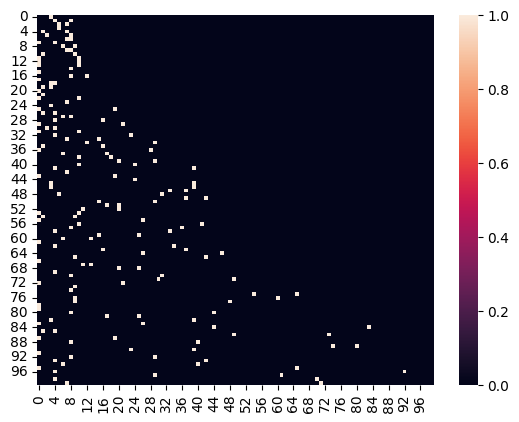

In [44]:
# plot adjacency matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pam.adjacency_matrix)
plt.show()


In [35]:
from clustering_algorithms.exponential_clustering import Exponential_Clustering, Exponential_Clustering_no_evecs

In [40]:
clusters,cos_A = Exponential_Clustering_no_evecs(pam.adjacency_matrix,K=3,t=5)
# comparing to the true communities
print(clusters)
print(pam._vertex_communities)

/home/georg/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 2 2 2 2 2 0 0 0 2 1 0 0 0 2 0 2 0 1 1 0 1 0 2 1 0 1 2 1 0 1 0 1 2 2 1 0
 2 0 2 0 1 2 0 0 1 1 1 2 1 2 2 2 0 1 0 0 2 1 2 2 0 1 1 0 1 0 2 2 1 2 0 0 1
 2 0 1 1 0 0 2 2 1 0 2 1 0 0 2 1 1 0 2 1 2 0 1 2 1 2]
[0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 1]


<AxesSubplot: >

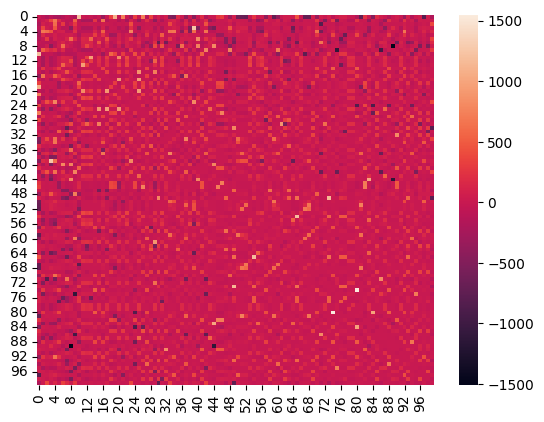

In [41]:
#make heatmap of cos_A
# set diagonal of cos_A to 0
np.fill_diagonal(cos_A,0)
sns.heatmap(cos_A)

In [42]:
permutation_matrix = np.zeros((len(clusters), len(clusters)), dtype=int)

permutation_matrix[range(len(clusters)), np.argsort(clusters)] = 1

<AxesSubplot: >

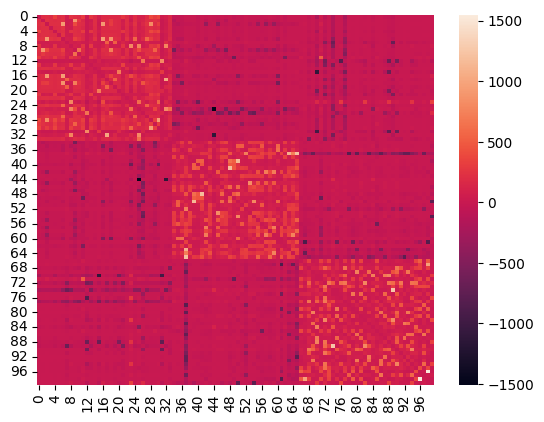

In [43]:
sns.heatmap(permutation_matrix@ cos_A @ permutation_matrix.T)